In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [42]:
img = cv2.imread("strange.jpg")
original_shape =img.shape
(img.shape)

(720, 1280, 3)

In [40]:
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

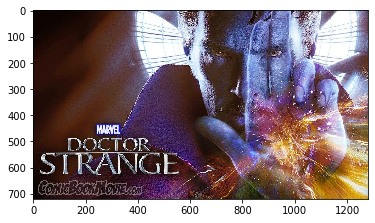

In [43]:
plt.imshow(img)
plt.show()

In [44]:
#Flatten each chanel of the image

all_pixels = img.reshape(-1 ,3)
print(all_pixels.shape)

(921600, 3)


In [51]:
from sklearn.cluster import KMeans

In [56]:
dominate_colors =4
km = KMeans(n_clusters = dominate_colors)
km.fit(all_pixels)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
centers = km.cluster_centers_

In [58]:
centers = np.array(centers,dtype='uint8')

In [59]:
print(centers)

[[146 136 164]
 [102  70  82]
 [225 229 237]
 [ 53  26  22]]


# Plot what all these  are color

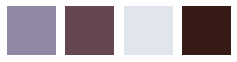

In [65]:
i =1

plt.figure(0,figsize=(4,2))


colors= []


for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    
    
    # color swatc
    a= np.zeros((100,100,3),dtype ='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

# segmentation our original img

In [75]:
new_img = np.zeros((720*1280,3),dtype = 'uint8')
print(new_img.shape)


(921600, 3)


In [76]:
colors

[array([146, 136, 164], dtype=uint8),
 array([102,  70,  82], dtype=uint8),
 array([225, 229, 237], dtype=uint8),
 array([53, 26, 22], dtype=uint8)]

In [77]:
km.labels_

array([3, 3, 3, ..., 0, 1, 0])

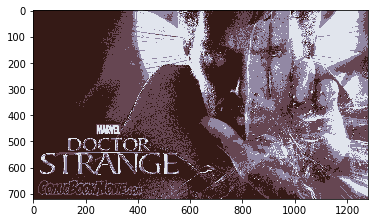

In [80]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()